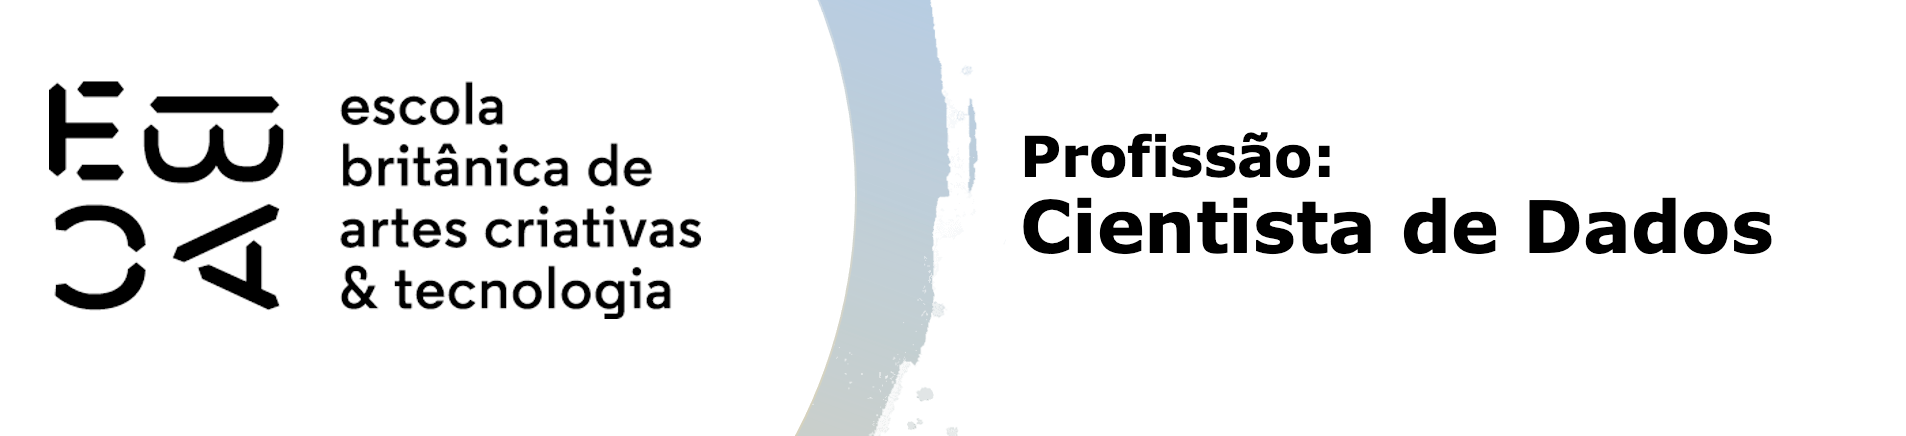

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
# !pip install pycaret

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_feather('./credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [4]:
# Dropando o index que não vamos utilizar
df.drop(columns='index', inplace=True)

In [5]:
# Separando os últimos três meses como safra de validação out of time (oot)

# Encontrando a data mais recente no DataFrame
data_max = df.data_ref.max()

# Calculando o limite de três meses atrás
tres_meses_atras = data_max - pd.DateOffset(months=3)

# Criando base de treino do modelo da oot
df_treino = df.loc[df.data_ref < tres_meses_atras]
df_oot = df.loc[df.data_ref >= tres_meses_atras]

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [6]:
# Descrevendo a base quanto ao número de linhas para cada mês em data_ref
df_por_mes = df['data_ref'].value_counts().sort_index().reset_index()
df_por_mes

,data_ref,count
0,2015-01-01,50000
1,2015-02-01,50000
2,2015-03-01,50000
3,2015-04-01,50000
4,2015-05-01,50000
5,2015-06-01,50000
6,2015-07-01,50000
7,2015-08-01,50000
8,2015-09-01,50000
9,2015-10-01,50000


In [7]:
# Separando as variáveis em quantitativas e qualitativas
df_unique_summary = pd.DataFrame({
    'coluna': df.columns,
    'n_unique': df.nunique().values
})

# Removendo essa linha que já vimos
df_unique_summary = df_unique_summary[df_unique_summary['coluna'] != 'data_ref']

# Criando uma coluna para dizer se é quantitativa ou qualitativa
df_unique_summary['tipo'] = df_unique_summary['n_unique'].apply(
    lambda x: 'quantitativo' if x > 6 else 'qualitativo'
)

# Ordenar por n_unique (decrescente)
df_unique_summary = df_unique_summary.sort_values(by='n_unique', ascending=True).reset_index(drop=True)

df_unique_summary

,coluna,n_unique,tipo
0,sexo,2,qualitativo
1,posse_de_veiculo,2,qualitativo
2,posse_de_imovel,2,qualitativo
3,mau,2,qualitativo
4,tipo_renda,5,qualitativo
5,educacao,5,qualitativo
6,estado_civil,5,qualitativo
7,tipo_residencia,6,qualitativo
8,qtd_filhos,8,quantitativo
9,qt_pessoas_residencia,9,quantitativo


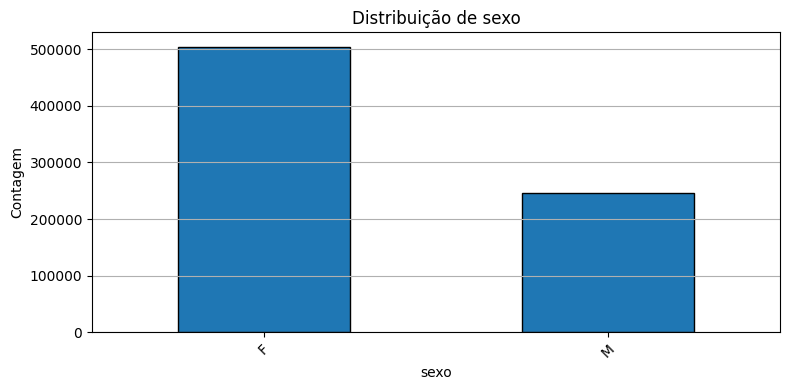

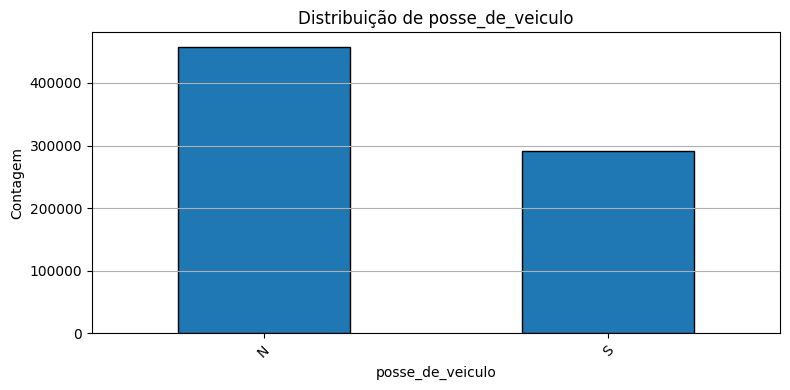

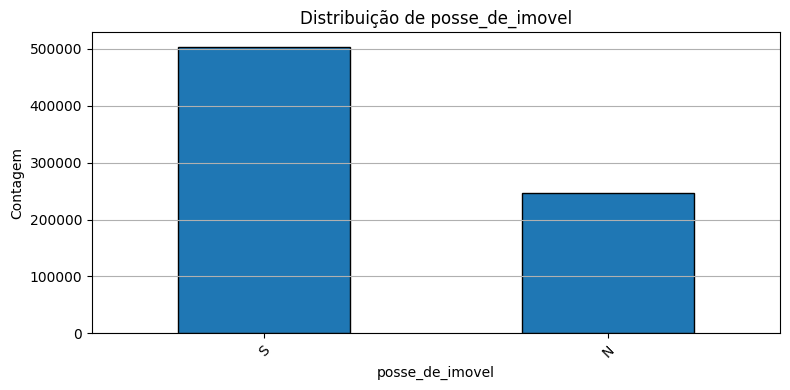

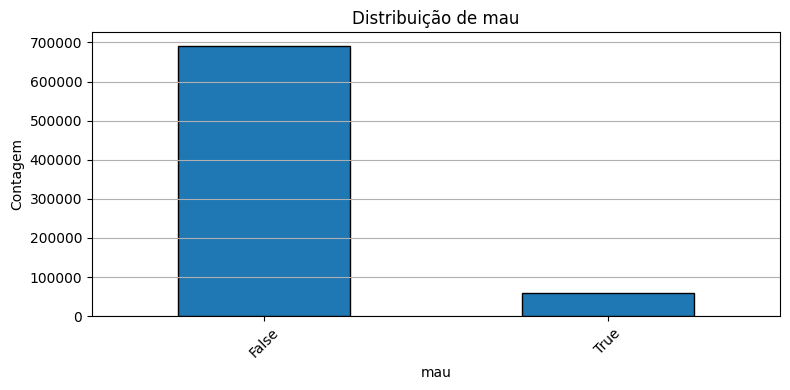

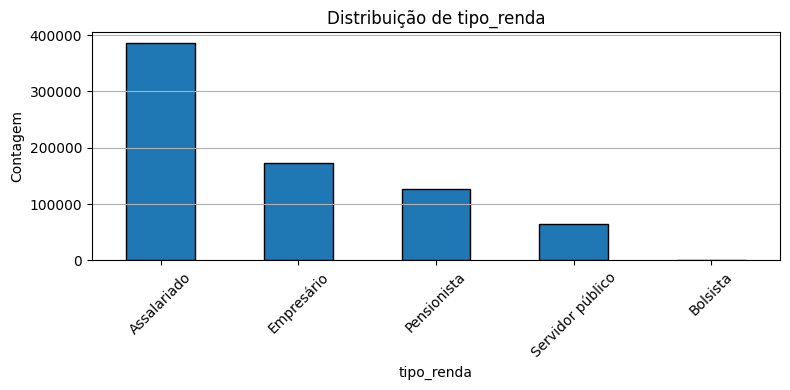

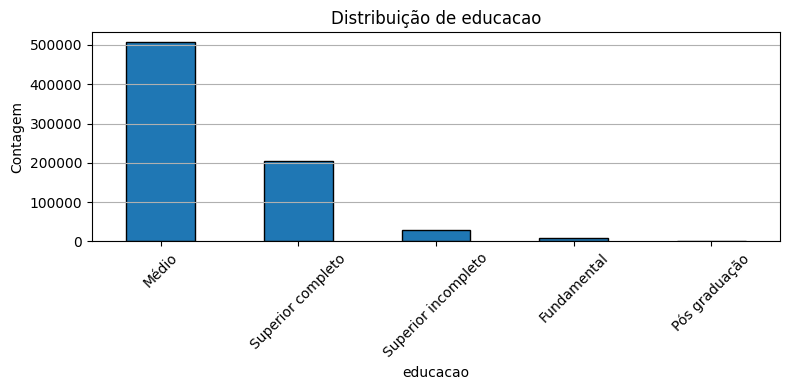

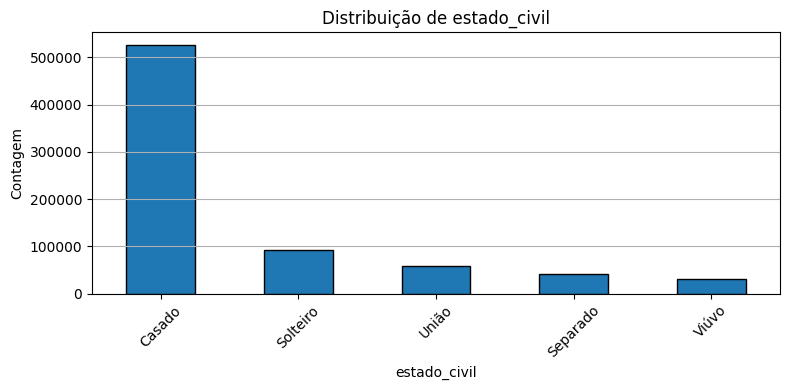

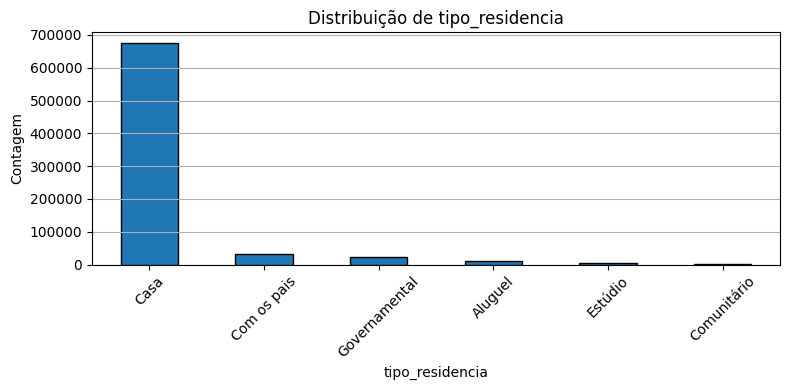

In [8]:
# Lista de variáveis qualitativas
variaveis_qualitativas = df_unique_summary[df_unique_summary['tipo'] == 'qualitativo']['coluna'].tolist()

# Para cada variável qualitativa
for var in variaveis_qualitativas:
    plt.figure(figsize=(8, 4))
    df[var].value_counts(dropna=False).plot(kind='bar', edgecolor='black')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [9]:
# Para as variáveis quantitativas algumas eu preferi fazer gráfico de barras (as que não eram contínuas) e as outras eu preferi fazer histogramas.

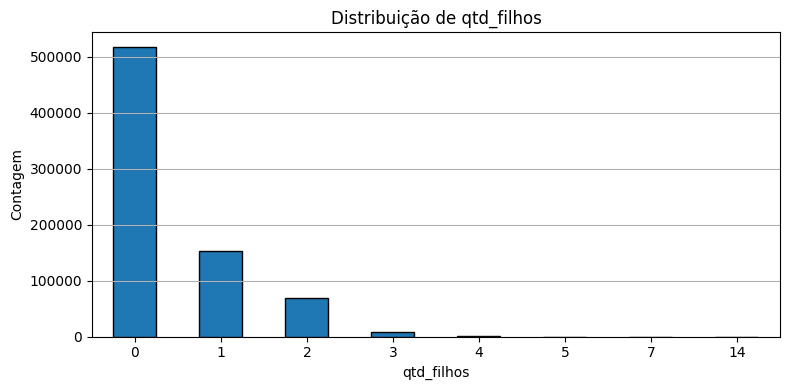

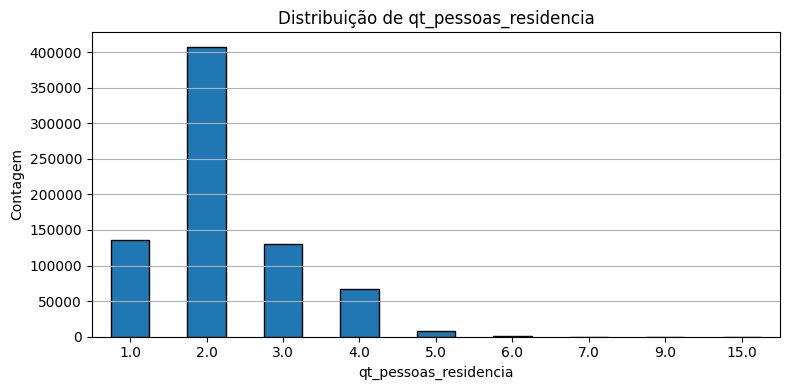

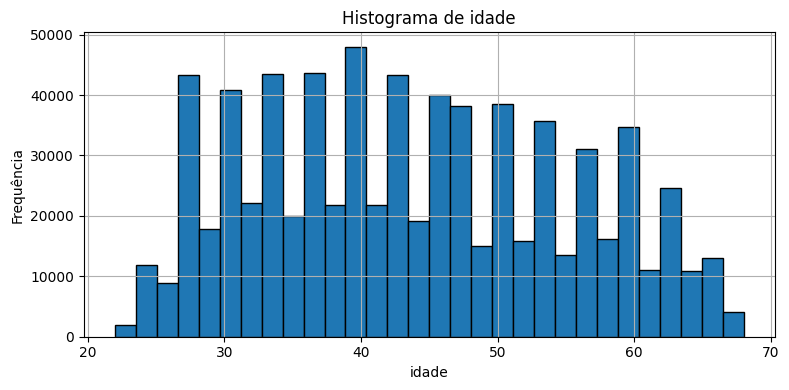

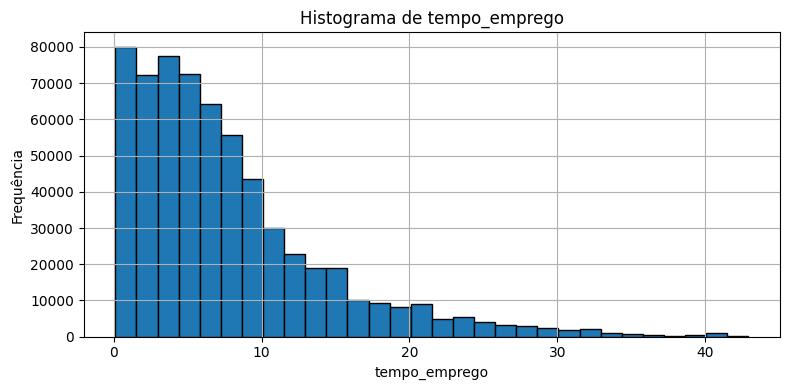

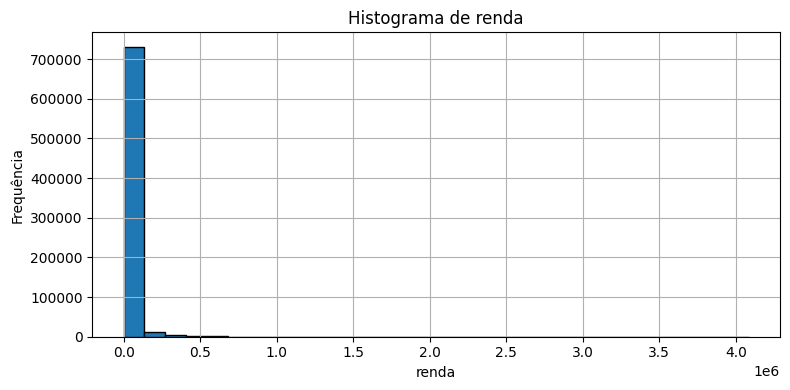

In [10]:
# Gráficos de barras
variaveis_barra = ['qtd_filhos', 'qt_pessoas_residencia']
for var in variaveis_barra:
    plt.figure(figsize=(8, 4))
    df[var].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Histogramas
variaveis_hist = ['idade','tempo_emprego', 'renda']
for var in variaveis_hist:
    plt.figure(figsize=(8, 4))
    plt.hist(df[var].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
# O gráfico de histograma foi altamente impactado por outliers. 
# Então busquei uma forma de amenizar esses outliers

Amostras abaixo do limite inferior: 0
Amostras acima do limite superior: 18987
Total de amostras removidas: 18987
Percentual removido: 2.53%


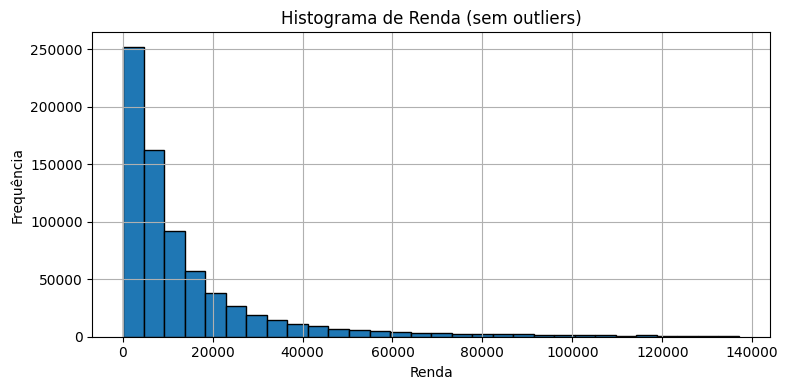

In [12]:
# Calcular os quartis e o IQR
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para os outliers (aqui eu testei alguns valores em "fator")
fator = 8
limite_inferior = Q1 - fator * IQR
limite_superior = Q3 + fator * IQR

# Calculando e printando o quanto eu excluí eu excluí
abaixo_limite = df[df['renda'] < limite_inferior]
acima_limite = df[df['renda'] > limite_superior]
total_amostras = len(df)
total_excluidas = len(abaixo_limite) + len(acima_limite)
percentual_excluidas = total_excluidas / total_amostras * 100
print(f"Amostras abaixo do limite inferior: {len(abaixo_limite)}")
print(f"Amostras acima do limite superior: {len(acima_limite)}")
print(f"Total de amostras removidas: {total_excluidas}")
print(f"Percentual removido: {percentual_excluidas:.2f}%")

# Filtrar a base para excluir os outliers
df_sem_outliers = df[(df['renda'] >= limite_inferior) & (df['renda'] <= limite_superior)]

# Plotando o histograma sem os outliers
plt.figure(figsize=(8, 4))
plt.hist(df_sem_outliers['renda'].dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Renda (sem outliers)')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [13]:
# Para a análise bivariada, vou usar o streamlit como recomendado pelo professor na aula.

# Montei o código abaixo para criar um arquivo streamlit PC e acessá-lo com o código abaixo.

# Se você, tutor, estiver rodando no próprio PC, talvez precise executar a célula !streamlit run streamlit_m37.py individualmente

In [14]:
# Criação do arquivo streamlit_m37.py

codigo_streamlit = '''
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_feather('./credit_scoring.ftr')

st.title("🔍 Análise Bivariada Interativa")

# Separando os tipos de variáveis
variaveis_numericas = df.select_dtypes(include='number').columns.tolist()
variaveis_categoricas = df.select_dtypes(include='object').columns.tolist()

# Seleção de variáveis
var_x = st.selectbox("Escolha a variável do eixo X", df.columns)
var_y = st.selectbox("Escolha a variável do eixo Y", df.columns)

# Gráfico
st.subheader("📊 Gráfico da relação entre as variáveis")

fig, ax = plt.subplots()

# Categórica x Categórica → countplot com hue
if df[var_x].dtype == 'object' and df[var_y].dtype == 'object':
    sns.countplot(data=df, x=var_x, hue=var_y, ax=ax)
    ax.set_ylabel("Contagem")
    ax.set_title(f"Distribuição de {var_x} por {var_y}")

# Categórica x Numérica → boxplot
elif df[var_x].dtype == 'object' and df[var_y].dtype != 'object':
    sns.boxplot(x=var_x, y=var_y, data=df, ax=ax)

# Numérica x Categórica → boxplot (inverso)
elif df[var_x].dtype != 'object' and df[var_y].dtype == 'object':
    sns.boxplot(x=var_y, y=var_x, data=df, ax=ax)

# Numérica x Numérica → scatterplot
else:
    sns.scatterplot(x=var_x, y=var_y, data=df, ax=ax)

st.pyplot(fig)
'''

with open("streamlit_m37.py", "w", encoding="utf-8") as f:
    f.write(codigo_streamlit)

print("✅ Arquivo streamlit_m37.py criado com sucesso!")

✅ Arquivo streamlit_m37.py criado com sucesso!


In [15]:
# Caro tutor, descomente a linha abaixo para abrir o streamlit 
# !streamlit run streamlit_m37.py

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [16]:
# Verificando se há valores missing
tb_missing = pd.DataFrame(df.dtypes, columns=['dtype'])
tb_missing['nmissing'] = df.isna().sum()
tb_missing

,dtype,nmissing
data_ref,datetime64[ns],0
sexo,object,0
posse_de_veiculo,object,0
posse_de_imovel,object,0
qtd_filhos,int64,0
tipo_renda,object,0
educacao,object,0
estado_civil,object,0
tipo_residencia,object,0
idade,int64,0


In [17]:
df.tempo_emprego.describe()

count    624043.000000
mean          7.748574
std           6.687455
min           0.117808
25%           3.049315
50%           6.046575
75%          10.183562
max          42.906849
Name: tempo_emprego, dtype: float64

In [18]:
# Vemos que tempo_emprego é uma variável com muitos missing. Como na aula, vamos considerá-lo como um "zero estrutural" e substituir
# por -1 para representar quem provavelmente não estava contratado.
df2 = df.copy()
df2.loc[df2['tempo_emprego'].isna(),'tempo_emprego'] = -1

In [19]:
df2.tempo_emprego.describe()

count    750000.000000
mean          6.279315
std           6.921453
min          -1.000000
25%           1.183562
50%           4.690411
75%           9.090411
max          42.906849
Name: tempo_emprego, dtype: float64

In [20]:
# Como vimos na análise descritiva, a principal variável com outliers é a de renda. Vou fazer a mesma transformação que fiz
# na parte descritiva para remover 2.53% da base que possuiem os maiores valores de renda.

# Calcular os quartis e o IQR
Q1 = df2['renda'].quantile(0.25)
Q3 = df2['renda'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para os outliers (aqui eu testei alguns valores em "fator")
fator = 8
limite_inferior = Q1 - fator * IQR
limite_superior = Q3 + fator * IQR

# Calculando e printando o quanto eu excluí eu excluí
abaixo_limite = df[df['renda'] < limite_inferior]
acima_limite = df[df['renda'] > limite_superior]
total_amostras = len(df)
total_excluidas = len(abaixo_limite) + len(acima_limite)
percentual_excluidas = total_excluidas / total_amostras * 100
print(f"Amostras abaixo do limite inferior: {len(abaixo_limite)}")
print(f"Amostras acima do limite superior: {len(acima_limite)}")
print(f"Total de amostras removidas: {total_excluidas}")
print(f"Percentual removido: {percentual_excluidas:.2f}%")

# Filtrar a base para excluir os outliers
df2 = df2[(df2['renda'] >= limite_inferior) & (df2['renda'] <= limite_superior)]

Amostras abaixo do limite inferior: 0
Amostras acima do limite superior: 18987
Total de amostras removidas: 18987
Percentual removido: 2.53%


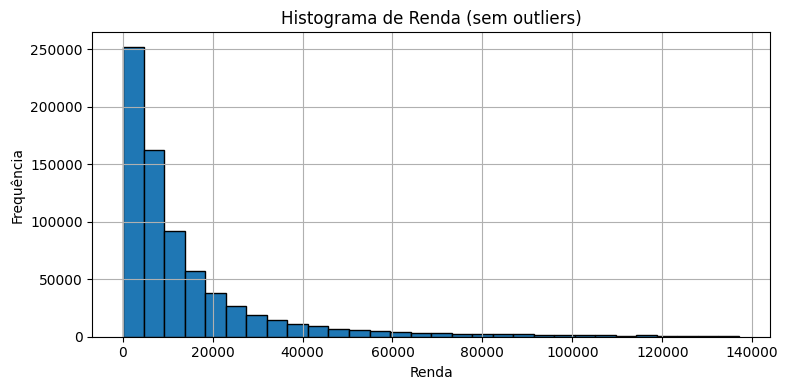

In [21]:
# Plotando o histograma sem os outliers
plt.figure(figsize=(8, 4))
plt.hist(df2['renda'].dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Renda (sem outliers)')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Agora iniciando o agrupamento em categorias como vimos na aula, vamos começar criando as funções para medir o IV e a tabela de metadados

In [23]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [24]:
metadados = pd.DataFrame(df2.dtypes, columns=['dtype'])
metadados['nmissing'] =df2.isna().sum()
metadados['valores_unicos'] = df2.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau','papel'] = 'resposta'
metadados.loc['bom','papel'] = 'resposta'
metadados

,dtype,nmissing,valores_unicos,papel
data_ref,datetime64[ns],0.0,15.0,covariavel
sexo,object,0.0,2.0,covariavel
posse_de_veiculo,object,0.0,2.0,covariavel
posse_de_imovel,object,0.0,2.0,covariavel
qtd_filhos,int64,0.0,8.0,covariavel
tipo_renda,object,0.0,5.0,covariavel
educacao,object,0.0,5.0,covariavel
estado_civil,object,0.0,5.0,covariavel
tipo_residencia,object,0.0,6.0,covariavel
idade,int64,0.0,47.0,covariavel


In [25]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                        'qt_mau': g['mau'].sum(),
                        'mau':g['mau'].mean(), 
                        var: g['mau'].mean().index, 
                        'cont':g[var].count()})
    
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')
    
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

In [26]:
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t

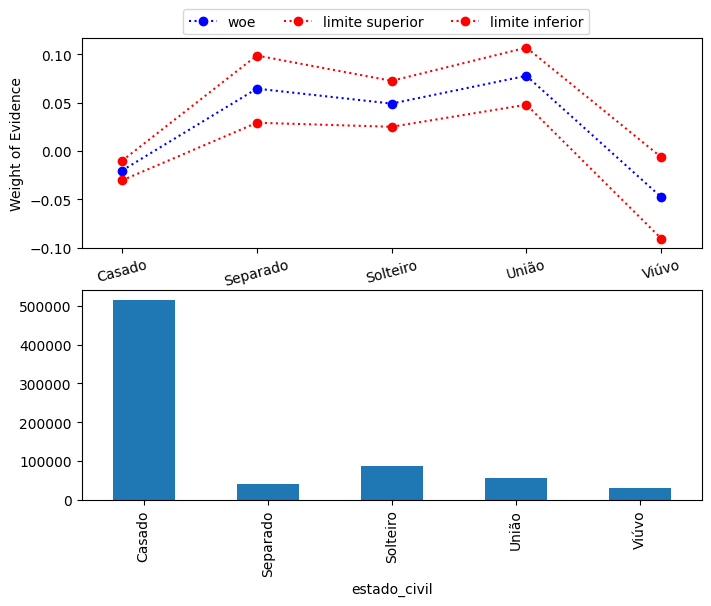

In [27]:
biv_discreta('estado_civil', df2);

,qt_bom,qt_mau,mau,estado_civil,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
estado_civil,,,,,,,,,,,,,,
Casado,474088,40505,0.078713,Casado,514593,0.000375,0.079448,0.077977,-2.459968,-2.449865,-2.470157,-0.020071,-0.009968,-0.030260
Separado/Solteiro/União,169979,15753,0.084816,Separado/Solteiro/União,185732,0.000646,0.086083,0.083549,-2.378644,-2.362430,-2.395079,0.061253,0.077467,0.044817
Viúvo,28333,2355,0.076740,Viúvo,30688,0.001519,0.079718,0.073762,-2.487486,-2.446181,-2.530289,-0.047590,-0.006284,-0.090392


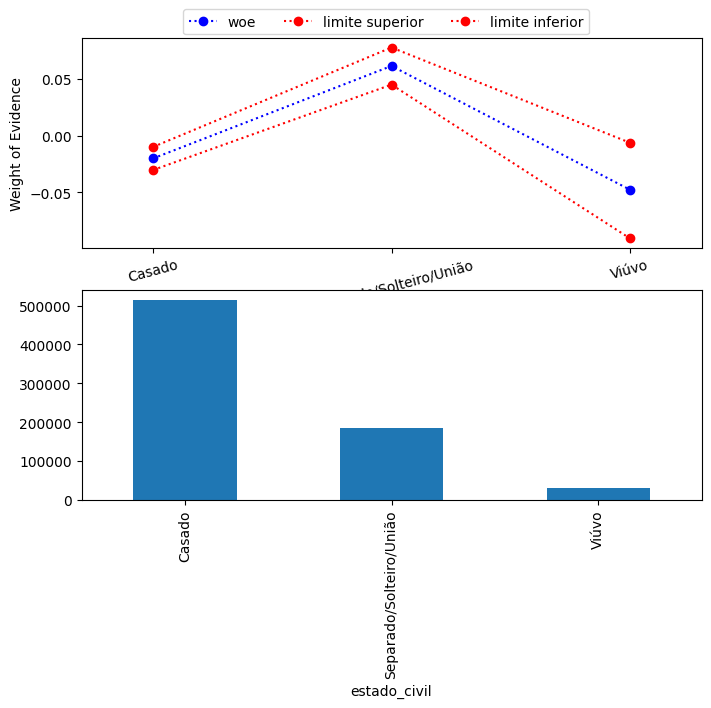

In [28]:
# Vemos que separado/solteiro e união possuem valores de WOE mais parecidos, então vamos experimentar uní-los
df2.estado_civil.replace({'Separado':'Separado/Solteiro/União', 'Solteiro': 'Separado/Solteiro/União', 'União': 'Separado/Solteiro/União'}, inplace=True)
biv_discreta('estado_civil', df2)

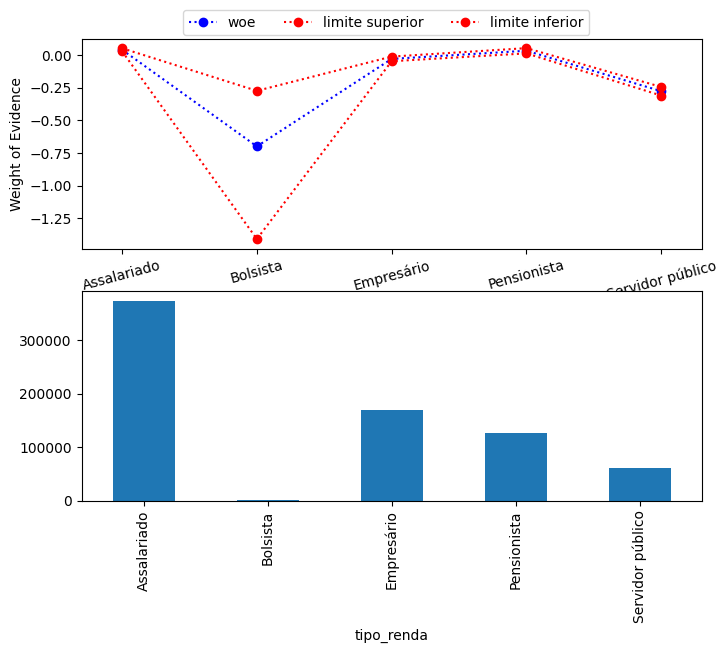

In [29]:
biv_discreta('tipo_renda', df2);

In [30]:
# A categoria "Bolsista" está atrabalhando muito essa visão, vamos visualizar sem ela.

C:\Users\berna\AppData\Local\Temp\ipykernel_9240\1384379299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bom'] = 1-df.mau


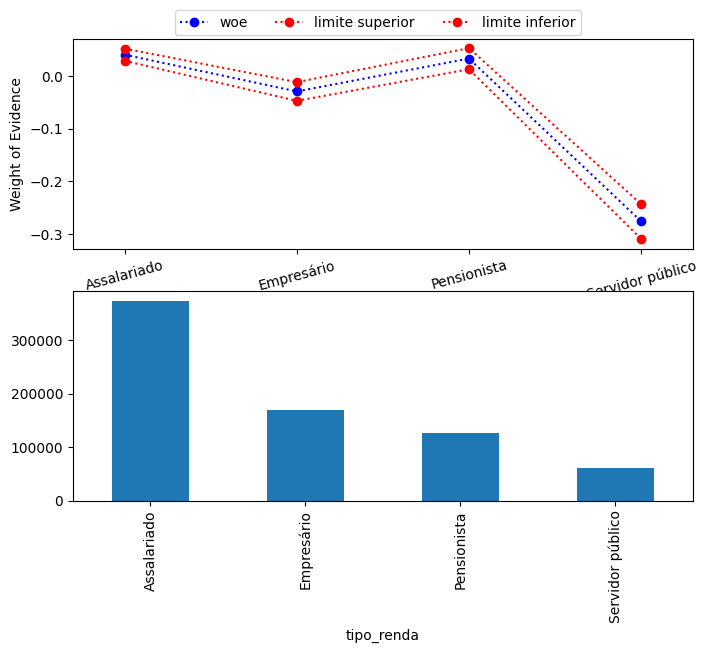

In [31]:
biv_discreta('tipo_renda', df2[df2['tipo_renda'] != 'Bolsista']);

In [32]:
# Parece que podemos juntar pensioista com assalariado. O Bolsista, por ter um volume pequeno e uma margem de erro alta,
# vamos juntar com o único outro com woe negativo que é o servidor público

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado/Pensionista,459256,41633,0.083118,Assalariado/Pensionista,500889,0.000390,0.083883,0.082354,-2.400715,-2.390725,-2.410789,0.039182,0.049172,0.029108
Bolsista/Servidor público,57314,3783,0.061918,Bolsista/Servidor público,61097,0.000975,0.063829,0.060007,-2.718028,-2.685591,-2.751414,-0.278131,-0.245694,-0.311517
Empresário,155830,13197,0.078076,Empresário,169027,0.000653,0.079355,0.076797,-2.468776,-2.451139,-2.486680,-0.028879,-0.011242,-0.046783


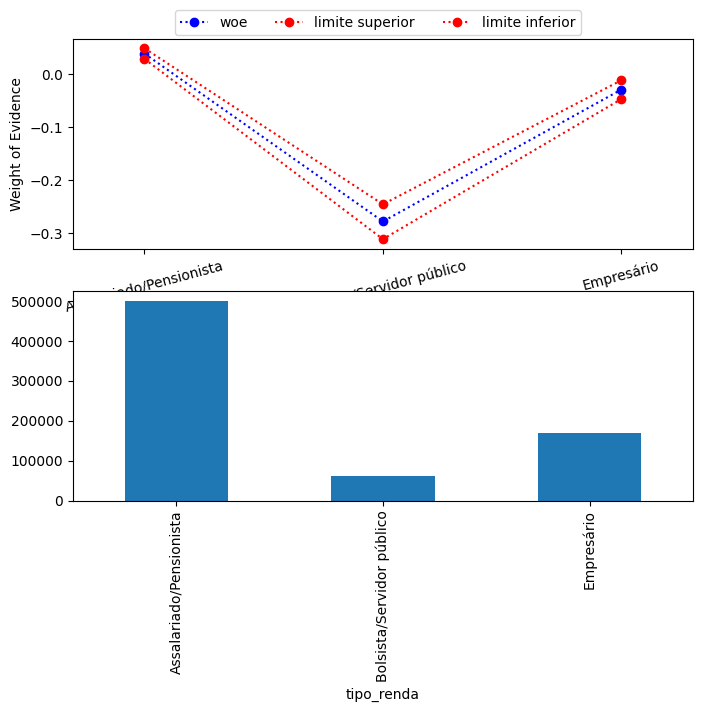

In [33]:
# Vemos que separado/solteiro e união possuem valores de WOE mais parecidos, então vamos experimentar uní-los
df2.tipo_renda.replace({'Assalariado':'Assalariado/Pensionista', 
                        'Pensionista': 'Assalariado/Pensionista',
                        'Bolsista': 'Bolsista/Servidor público',
                        'Servidor público': 'Bolsista/Servidor público'}, inplace=True)
biv_discreta('tipo_renda', df2)

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,7761,786,0.091962,Fundamental,8547,0.003126,0.098089,0.085835,-2.289910,-2.218638,-2.365585,0.149987,0.221259,0.074312
Médio,453388,40705,0.082383,Médio,494093,0.000391,0.083150,0.081617,-2.410397,-2.400299,-2.420582,0.029500,0.039598,0.019315
Pós graduação,753,59,0.072660,Pós graduação,812,0.009109,0.090541,0.054779,-2.546528,-2.307049,-2.848105,-0.106631,0.132848,-0.408209
Superior completo,183981,14618,0.073606,Superior completo,198599,0.000586,0.074754,0.072457,-2.532579,-2.515856,-2.549544,-0.092682,-0.075959,-0.109647
Superior incompleto,26517,2445,0.084421,Superior incompleto,28962,0.001634,0.087623,0.081219,-2.383741,-2.343010,-2.425899,0.056156,0.096887,0.013997


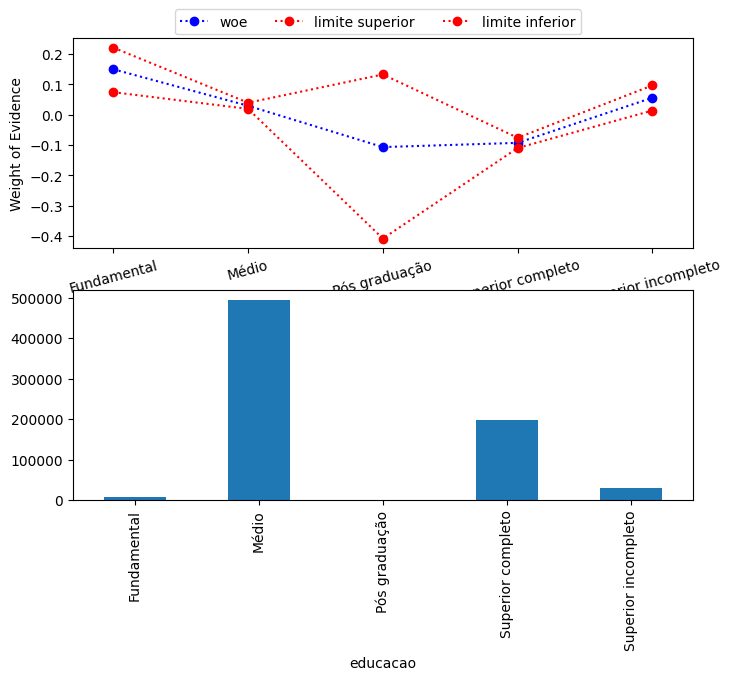

In [34]:
biv_discreta('educacao', df2)

In [35]:
# Por "Fundamental" e "Pós-graduação" terem quantidades muito pequenas de representantes e grande margem de erro, vamos juntá-los
# com seus representantes mais próximos

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental/Médio,461149,41491,0.082546,Fundamental/Médio,502640,0.000388,0.083307,0.081785,-2.408245,-2.398241,-2.418333,0.031652,0.041656,0.021564
Superior completo,184734,14677,0.073602,Superior completo,199411,0.000585,0.074748,0.072456,-2.532635,-2.515946,-2.549566,-0.092738,-0.076049,-0.109669
Superior incompleto,26517,2445,0.084421,Superior incompleto,28962,0.001634,0.087623,0.081219,-2.383741,-2.343010,-2.425899,0.056156,0.096887,0.013997


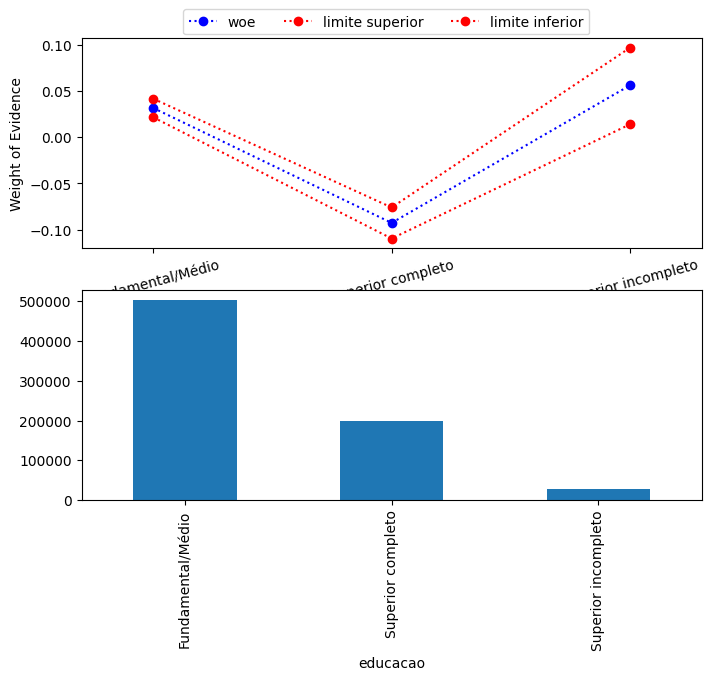

In [36]:
# Vemos que separado/solteiro e união possuem valores de WOE mais parecidos, então vamos experimentar uní-los
df2.educacao.replace({'Fundamental':'Fundamental/Médio', 
                        'Médio': 'Fundamental/Médio',
                        'Pós graduação': 'Superior completo'}, inplace=True)
biv_discreta('educacao', df2)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel,9305,933,0.091131,Aluguel,10238,0.002844,0.096706,0.085556,-2.299902,-2.234367,-2.369149,0.139995,0.205530,0.070748
Casa,604652,51976,0.079156,Casa,656628,0.000333,0.079809,0.078503,-2.453871,-2.444946,-2.462864,-0.013974,-0.005049,-0.022967
Com os pais,29842,3146,0.095368,Com os pais,32988,0.001617,0.098538,0.092198,-2.249785,-2.213578,-2.287085,0.190112,0.226318,0.152812
Comunitário,2940,278,0.086389,Comunitário,3218,0.004952,0.096099,0.076679,-2.358544,-2.241338,-2.488351,0.081353,0.198559,-0.048454
Estúdio,4941,353,0.066679,Estúdio,5294,0.003429,0.073401,0.059958,-2.638855,-2.535587,-2.752285,-0.198958,-0.095690,-0.312388
Governamental,20720,1927,0.085089,Governamental,22647,0.001854,0.088723,0.081454,-2.375135,-2.329333,-2.422747,0.064762,0.110564,0.017150


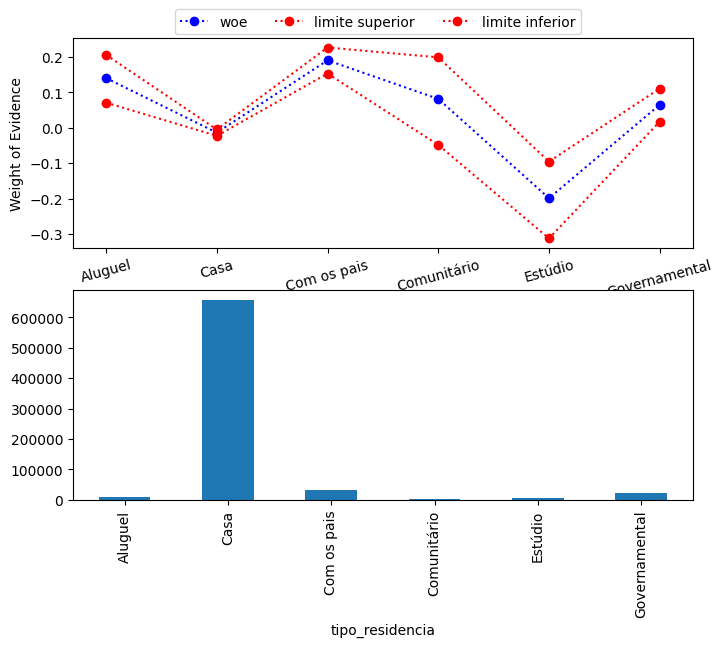

In [37]:
biv_discreta('tipo_residencia', df2)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel/Com os pais,39147,4079,0.094365,Aluguel/Com os pais,43226,0.001406,0.097120,0.091609,-2.261472,-2.229637,-2.294151,0.178425,0.210260,0.145746
Estúdio/Casa,609593,52329,0.079056,Estúdio/Casa,661922,0.000332,0.079706,0.078406,-2.455241,-2.446346,-2.464203,-0.015344,-0.006449,-0.024306
Governamental/Comunitário,23660,2205,0.085250,Governamental/Comunitário,25865,0.001736,0.088654,0.081847,-2.373058,-2.330185,-2.417513,0.066839,0.109712,0.022384


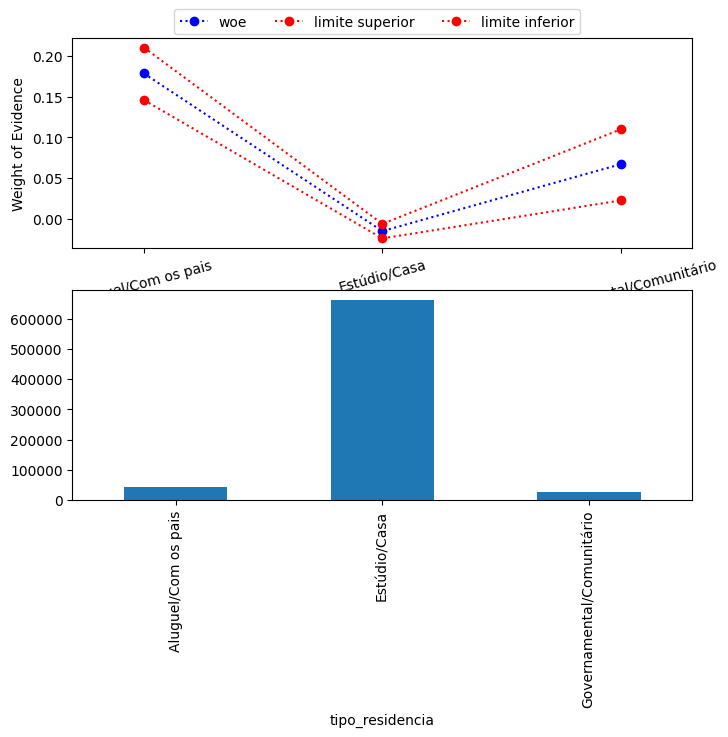

In [38]:
# Esta aglomeração não foi tão clara quanto as demais, mas vamos tentar agrupar de acordo com aproximações do WOE:
df2.tipo_residencia.replace({
    'Estúdio': 'Estúdio/Casa',
    'Casa': 'Estúdio/Casa',
    'Governamental': 'Governamental/Comunitário',
    'Comunitário': 'Governamental/Comunitário',
    'Aluguel': 'Aluguel/Com os pais',
    'Com os pais': 'Aluguel/Com os pais'
}, inplace=True)

biv_discreta('tipo_residencia', df2)

In [39]:
# Agora, a última coisa antes de treinar o modelo é redividir a base em desenvolvimento e oof após todas as transformações que fizemos
df_treino = df2.loc[df2.data_ref < tres_meses_atras]
df_oot = df2.loc[df2.data_ref >= tres_meses_atras]

In [40]:
# Agora propondo uma equação preditiva para 'mau', vamos iniciar com todas as variáveis
formula = '''
    mau ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos 
    + tipo_renda + educacao + estado_civil + tipo_residencia 
    + idade + tempo_emprego + qt_pessoas_residencia + renda
'''

rl = smf.glm(formula, data=df_treino, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                      
=======================================================================================
Dep. Variable:     ['mau[False]', 'mau[True]']   No. Observations:               532087
Model:                                     GLM   Df Residuals:                   532070
Model Family:                         Binomial   Df Model:                           16
Link Function:                           Logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:            -1.0944e+05
Date:                         Wed, 21 May 2025   Deviance:                   2.1888e+05
Time:                                 19:25:36   Pearson chi2:                 8.44e+07
No. Iterations:                              8   Pseudo R-squ. (CS):            0.04006
Covariance Type:                     nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.4947      0.061     24.511      0.000       1.375       1.614
sexo[T.M]                                        0.1004      0.014      7.158      0.000       0.073       0.128
posse_de_veiculo[T.S]                           -0.0361      0.013     -2.725      0.006      -0.062      -0.010
posse_de_imovel[T.S]                             0.0762      0.013      6.033      0.000       0.051       0.101
tipo_renda[T.Bolsista/Servidor público]          0.0298      0.025      1.197      0.231      -0.019       0.079
tipo_renda[T.Empresário]                         0.0194      0.015      1.314      0.189      -0.010       0.048
educacao[T.Superior completo]                    0.0538      0.014      3.794      0.000       0.026       0.082
educacao[T.Superior incompleto]                  0.0529      0.030      1.744      0.081      -0.007       0.112
estado_civil[T.Separado/Solteiro/União]         -0.0527      0.021     -2.457      0.014      -0.095      -0.011
estado_civil[T.Viúvo]                            0.0203      0.039      0.517      0.605      -0.057       0.097
tipo_residencia[T.Estúdio/Casa]                  0.0352      0.024      1.471      0.141      -0.012       0.082
tipo_residencia[T.Governamental/Comunitário]     0.0326      0.038      0.855      0.392      -0.042       0.107
qtd_filhos                                       0.0221      0.026      0.849      0.396      -0.029       0.073
idade                                            0.0031      0.001      4.894      0.000       0.002       0.004
tempo_emprego                                    0.0098      0.002      5.920      0.000       0.007       0.013
qt_pessoas_residencia                           -0.0302      0.024     -1.249      0.212      -0.078       0.017
renda                                            0.0001   1.14e-06     93.428      0.000       0.000       0.000
================================================================================================================
"""

In [41]:
# Vemos que tipo_renda, tipo_residencia, qtd_filhos estão com p-valor muito alto. Vamos removê-las
formula = '''
    mau ~ sexo + posse_de_veiculo + posse_de_imovel 
    + educacao + estado_civil 
    + idade + tempo_emprego + qt_pessoas_residencia + renda
'''

rl = smf.glm(formula, data=df_treino, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                      
=======================================================================================
Dep. Variable:     ['mau[False]', 'mau[True]']   No. Observations:               532087
Model:                                     GLM   Df Residuals:                   532075
Model Family:                         Binomial   Df Model:                           11
Link Function:                           Logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:            -1.0944e+05
Date:                         Wed, 21 May 2025   Deviance:                   2.1888e+05
Time:                                 19:25:50   Pearson chi2:                 8.46e+07
No. Iterations:                              8   Pseudo R-squ. (CS):            0.04005
Covariance Type:                     nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.4935      0.041     36.775      0.000       1.414       1.573
sexo[T.M]                                   0.0992      0.014      7.084      0.000       0.072       0.127
posse_de_veiculo[T.S]                      -0.0362      0.013     -2.733      0.006      -0.062      -0.010
posse_de_imovel[T.S]                        0.0794      0.012      6.406      0.000       0.055       0.104
educacao[T.Superior completo]               0.0572      0.014      4.076      0.000       0.030       0.085
educacao[T.Superior incompleto]             0.0544      0.030      1.798      0.072      -0.005       0.114
estado_civil[T.Separado/Solteiro/União]    -0.0404      0.015     -2.623      0.009      -0.071      -0.010
estado_civil[T.Viúvo]                       0.0378      0.032      1.169      0.242      -0.026       0.101
idade                                       0.0030      0.001      4.993      0.000       0.002       0.004
tempo_emprego                               0.0103      0.002      6.269      0.000       0.007       0.013
qt_pessoas_residencia                      -0.0108      0.008     -1.383      0.167      -0.026       0.005
renda                                       0.0001   1.14e-06     93.445      0.000       0.000       0.000
===========================================================================================================
"""

In [42]:
# Agora faremos uma segunda remoção de estado_civil e qt_pessoas_reseidencia para ver o resultado
formula = '''
    mau ~ sexo + posse_de_veiculo + posse_de_imovel 
    + educacao + idade + tempo_emprego + renda
'''

rl = smf.glm(formula, data=df_treino, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                      
=======================================================================================
Dep. Variable:     ['mau[False]', 'mau[True]']   No. Observations:               532087
Model:                                     GLM   Df Residuals:                   532078
Model Family:                         Binomial   Df Model:                            8
Link Function:                           Logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:            -1.0945e+05
Date:                         Wed, 21 May 2025   Deviance:                   2.1889e+05
Time:                                 19:26:02   Pearson chi2:                 8.43e+07
No. Iterations:                              8   Pseudo R-squ. (CS):            0.04003
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4372      0.030     48.559      0.000       1.379       1.495
sexo[T.M]                           0.0986      0.014      7.059      0.000       0.071       0.126
posse_de_veiculo[T.S]              -0.0338      0.013     -2.575      0.010      -0.060      -0.008
posse_de_imovel[T.S]                0.0793      0.012      6.400      0.000       0.055       0.104
educacao[T.Superior completo]       0.0563      0.014      4.012      0.000       0.029       0.084
educacao[T.Superior incompleto]     0.0536      0.030      1.773      0.076      -0.006       0.113
idade                               0.0036      0.001      6.254      0.000       0.002       0.005
tempo_emprego                       0.0102      0.002      6.251      0.000       0.007       0.013
renda                               0.0001   1.14e-06     93.488      0.000       0.000       0.000
===================================================================================================
"""

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [43]:
# Avaliando acurácia, KS e Gini para a base de desenvolvimento

df_treino['score'] = rl.predict(df_treino)

# Acurácia
acc = metrics.accuracy_score(df_treino.mau, df_treino.score>.5)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df_treino.mau, df_treino.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df_treino.loc[df_treino.mau == 1, 'score'], df_treino.loc[df_treino.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

C:\Users\berna\AppData\Local\Temp\ipykernel_9240\1048511657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino['score'] = rl.predict(df_treino)


Acurácia: 6.0% 
AUC: 24.0% 
GINI: -52.0%
KS: 38.6%


In [44]:
# Avaliando acurácia, KS e Gini para a base oot

df_oot['score'] = rl.predict(df_oot)

# Acurácia
acc = metrics.accuracy_score(df_oot.mau, df_oot.score>.5)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df_oot.mau, df_oot.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df_oot.loc[df_oot.mau == 1, 'score'], df_oot.loc[df_oot.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

Acurácia: 13.5% 
AUC: 26.6% 
GINI: -46.8%
KS: 34.6%


C:\Users\berna\AppData\Local\Temp\ipykernel_9240\3222266237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oot['score'] = rl.predict(df_oot)


In [45]:
# Ou seja, parece que o modelo tem métricas de desempenho muito baixas.

In [46]:
# A acurácia está péssima. Vamos ver o porque:
df_treino['score'].describe()

count    532087.000000
mean          0.940309
std           0.044207
min           0.821947
25%           0.903575
50%           0.943462
75%           0.981849
max           1.000000
Name: score, dtype: float64

In [47]:
# O score está muito alto. Vamos tentar balancear o modelo

In [48]:
# Garanta que é uma cópia independente
df_treino2 = df_treino.copy()

# Modelo SEM pesos
modelo_sem_peso = smf.glm(formula, data=df_treino, family=sm.families.Binomial()).fit()
df_treino['score_sem_peso'] = modelo_sem_peso.predict(df_treino)

# Modelo COM pesos
peso_mau = len(df_treino2) / (2 * (df_treino2['mau'] == 1).sum())
peso_bom = len(df_treino2) / (2 * (df_treino2['mau'] == 0).sum())

df_treino2['peso'] = df_treino2['mau'].apply(lambda x: peso_mau if x == 1 else peso_bom)

modelo_com_peso = smf.glm(formula, data=df_treino2, family=sm.families.Binomial()).fit(weights=df_treino2['peso'])
df_treino2['score_com_peso'] = modelo_com_peso.predict(df_treino2)

# Verificar as diferenças
print("Score SEM peso:")
print(df_treino['score_sem_peso'].describe())
print("\nScore COM peso:")
print(df_treino2['score_com_peso'].describe())

C:\Users\berna\AppData\Local\Temp\ipykernel_9240\282629476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino['score_sem_peso'] = modelo_sem_peso.predict(df_treino)


Score SEM peso:
count    532087.000000
mean          0.940309
std           0.044207
min           0.821947
25%           0.903575
50%           0.943462
75%           0.981849
max           1.000000
Name: score_sem_peso, dtype: float64

Score COM peso:
count    532087.000000
mean          0.940309
std           0.044207
min           0.821947
25%           0.903575
50%           0.943462
75%           0.981849
max           1.000000
Name: score_com_peso, dtype: float64


In [49]:
# Parece que o score do modelo não mudou com ou sem peso.

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

In [50]:
# Importando o sklearn pipeline como solicitado (e alguns outros módulos que serão importantes)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [51]:
# Como o professor pediu na aula, vou asummir que há dados nulos e criar pipelines para ambos os tipos (numéricos e categóricos)

# Preprocessamento para colunas numéricas
pipeline_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessamento para colunas categóricas
pipeline_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [52]:
# Para isso vamos alterar o pipeline_cat:
from sklearn.preprocessing import OneHotEncoder

# Preprocessamento para colunas categóricas com OneHotEncoder
pipeline_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Tratamento de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [53]:
# Pra remover outlliers eu achei um pouco mais difícil porque não achei exemplo na aula
# Mas consegui uma referência externa que sugeria criar uma função (que ficou parecida com a que entreguei na última aula)
# Primeiro vou precisar criar essa classe "Handler" com as funções fit e transform

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, multiplier=8): # defini um 'multiplier' bem alto, mas é o equivalente ao que testei no exercícios anterior para não remover dados demais
        self.multiplier = multiplier
        
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        self.cols = X_df.columns
        self.bounds = {}
        for col in self.cols:
            q1 = X_df[col].quantile(0.25)
            q3 = X_df[col].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - self.multiplier * iqr
            upper = q3 + self.multiplier * iqr
            self.bounds[col] = (lower, upper)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X).copy()
        for col in self.cols:
            lower, upper = self.bounds[col]
            outlier_mask = ~X_df[col].between(lower, upper)
            X_df.loc[outlier_mask, col] = np.nan
        return X_df

In [54]:
# Vamos agora salvar esse dentro do pipeline num (o categórico não precisa)
from sklearn.compose import make_column_selector

numerical_pipeline = Pipeline(steps=[
    ('outlier_handler', OutlierHandler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

In [55]:
# Para unificar o tratamento das diferentes variáveis (num e cat) vou fazer um "preprocessor" para inserir na pipeline final
from sklearn.compose import make_column_selector

preprocessor = ColumnTransformer(transformers=[
    ('num', pipeline_num, make_column_selector(dtype_include='number')),
    ('cat', pipeline_cat, make_column_selector(dtype_include='object'))
])

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [56]:
# Vou optar pela técnica de Feature importance por possuir uma velocidade maior que o Boruta

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

pipeline_final = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', SelectFromModel(LGBMClassifier(n_estimators=100)))
    ])

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [57]:
from sklearn.decomposition import PCA
# Essa parte é a mais simples até agora
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(LGBMClassifier(n_estimators=100))),
    ('pca', PCA(n_components=5))
])

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [58]:
# Para finalizar o pipeline, vamos inserir o lightgbm no final que é o que será importante para realizar o processamento do modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(LGBMClassifier(n_estimators=100, verbosity=-1))),
    ('pca', PCA(n_components=5)),
    ('classifier', LGBMClassifier(n_estimators=100))
])

### Treinar um modelo de regressão logistica com o resultado 

In [59]:
# Separando variáveis preditoras (X) e alvo (y)
X_train = df_treino.drop(columns='mau')
y_train = df_treino['mau']

X_test = df_oot.drop(columns='mau')
y_test = df_oot['mau']

In [60]:
# Treinamento do modelo
pipeline.fit(X_train, y_train)

C:\Users\berna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D70C4CEA50>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D70C54F890>)])),
                ('feature_selection',
                 SelectFromModel(estimator=LGBMClassifier(verbosity=-1))),
                ('pca', PCA(n_components=5)),
                ('classifier', LGBMClassifier())])

### Salvar o pickle file do modelo treinado

In [61]:
import pickle

nome_arquivo = 'model_final.pkl'
pickle.dump(pipeline, open(nome_arquivo, 'wb'))

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [62]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [63]:
from pycaret.classification import *

In [64]:
# Refazendo os passos da aula como solicitado

dataset = df.sample(40000)
dataset.drop(['data_ref','index'], axis=1, inplace=True)
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


,Description,Value
0,Session id,8078
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(60478, 30)"
5,Transformed train set shape,"(49078, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,16.9%


In [65]:
# Exibindo os modelos disponíveis
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [66]:
modelo_lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.7837,0.0725,0.4545,0.1250,0.1059,0.1576
1,0.9211,0.7811,0.0728,0.4412,0.1250,0.1054,0.1548
2,0.9207,0.7764,0.0728,0.4286,0.1245,0.1043,0.1517
3,0.9173,0.7350,0.0388,0.2667,0.0678,0.0491,0.0756
4,0.9173,0.7671,0.0340,0.2500,0.0598,0.0421,0.0666
5,0.9218,0.7724,0.0728,0.4688,0.1261,0.1075,0.1615
6,0.9229,0.7798,0.0971,0.5128,0.1633,0.1421,0.1987
7,0.9214,0.8056,0.0631,0.4483,0.1106,0.0933,0.1457
8,0.9226,0.7779,0.0825,0.5000,0.1417,0.1224,0.1799


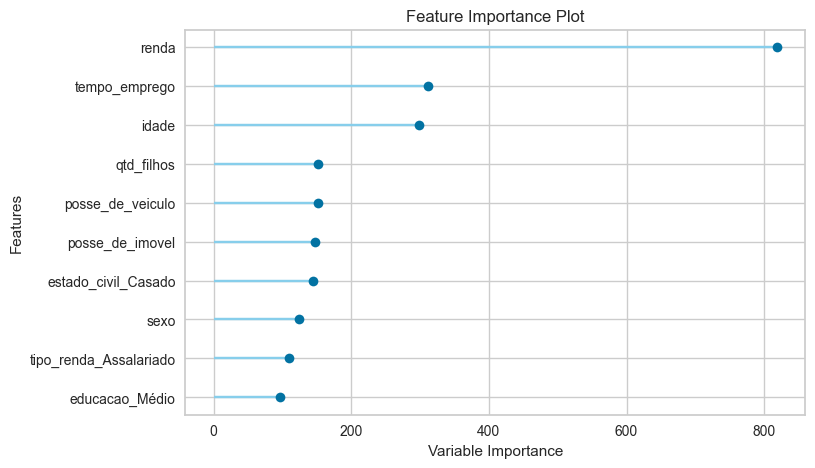

In [67]:
# Exibindo o gráfico como na aula, só que agora especificamente do lightgbm
plot_model(modelo_lgbm, plot='feature')

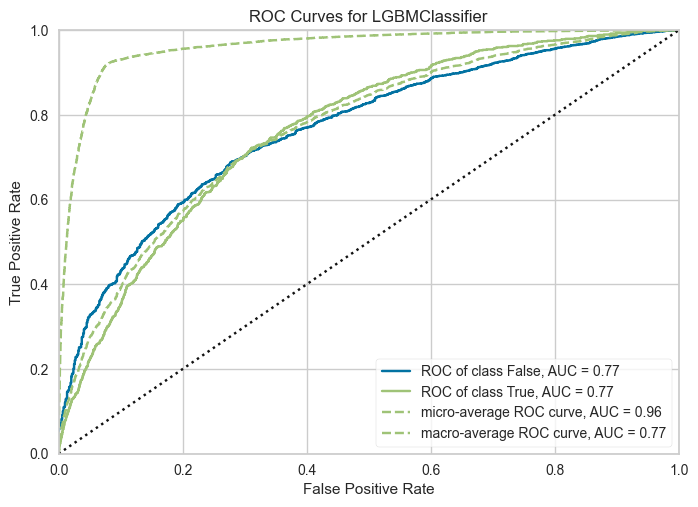

In [68]:
plot_model(modelo_lgbm, plot='auc')

In [69]:
# Salvando o modelo e exibindo o pipeline
save_model(modelo_lgbm,'Modelo Exercicio 1 Mod38 - Bernardo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
            

# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.